In [10]:
import numpy as np
#from numpy import np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
#matplotlib.rcParams.update({'figure.autolayout': False})
matplotlib.rcParams['figure.dpi'] = 300

In [45]:
np.random.seed(16) #set seed for reproducibility purposes
x = np.arange(10) 
y = 2*x + 5 + 5*np.random.randn(10) #generate some data with random gaussian scatter

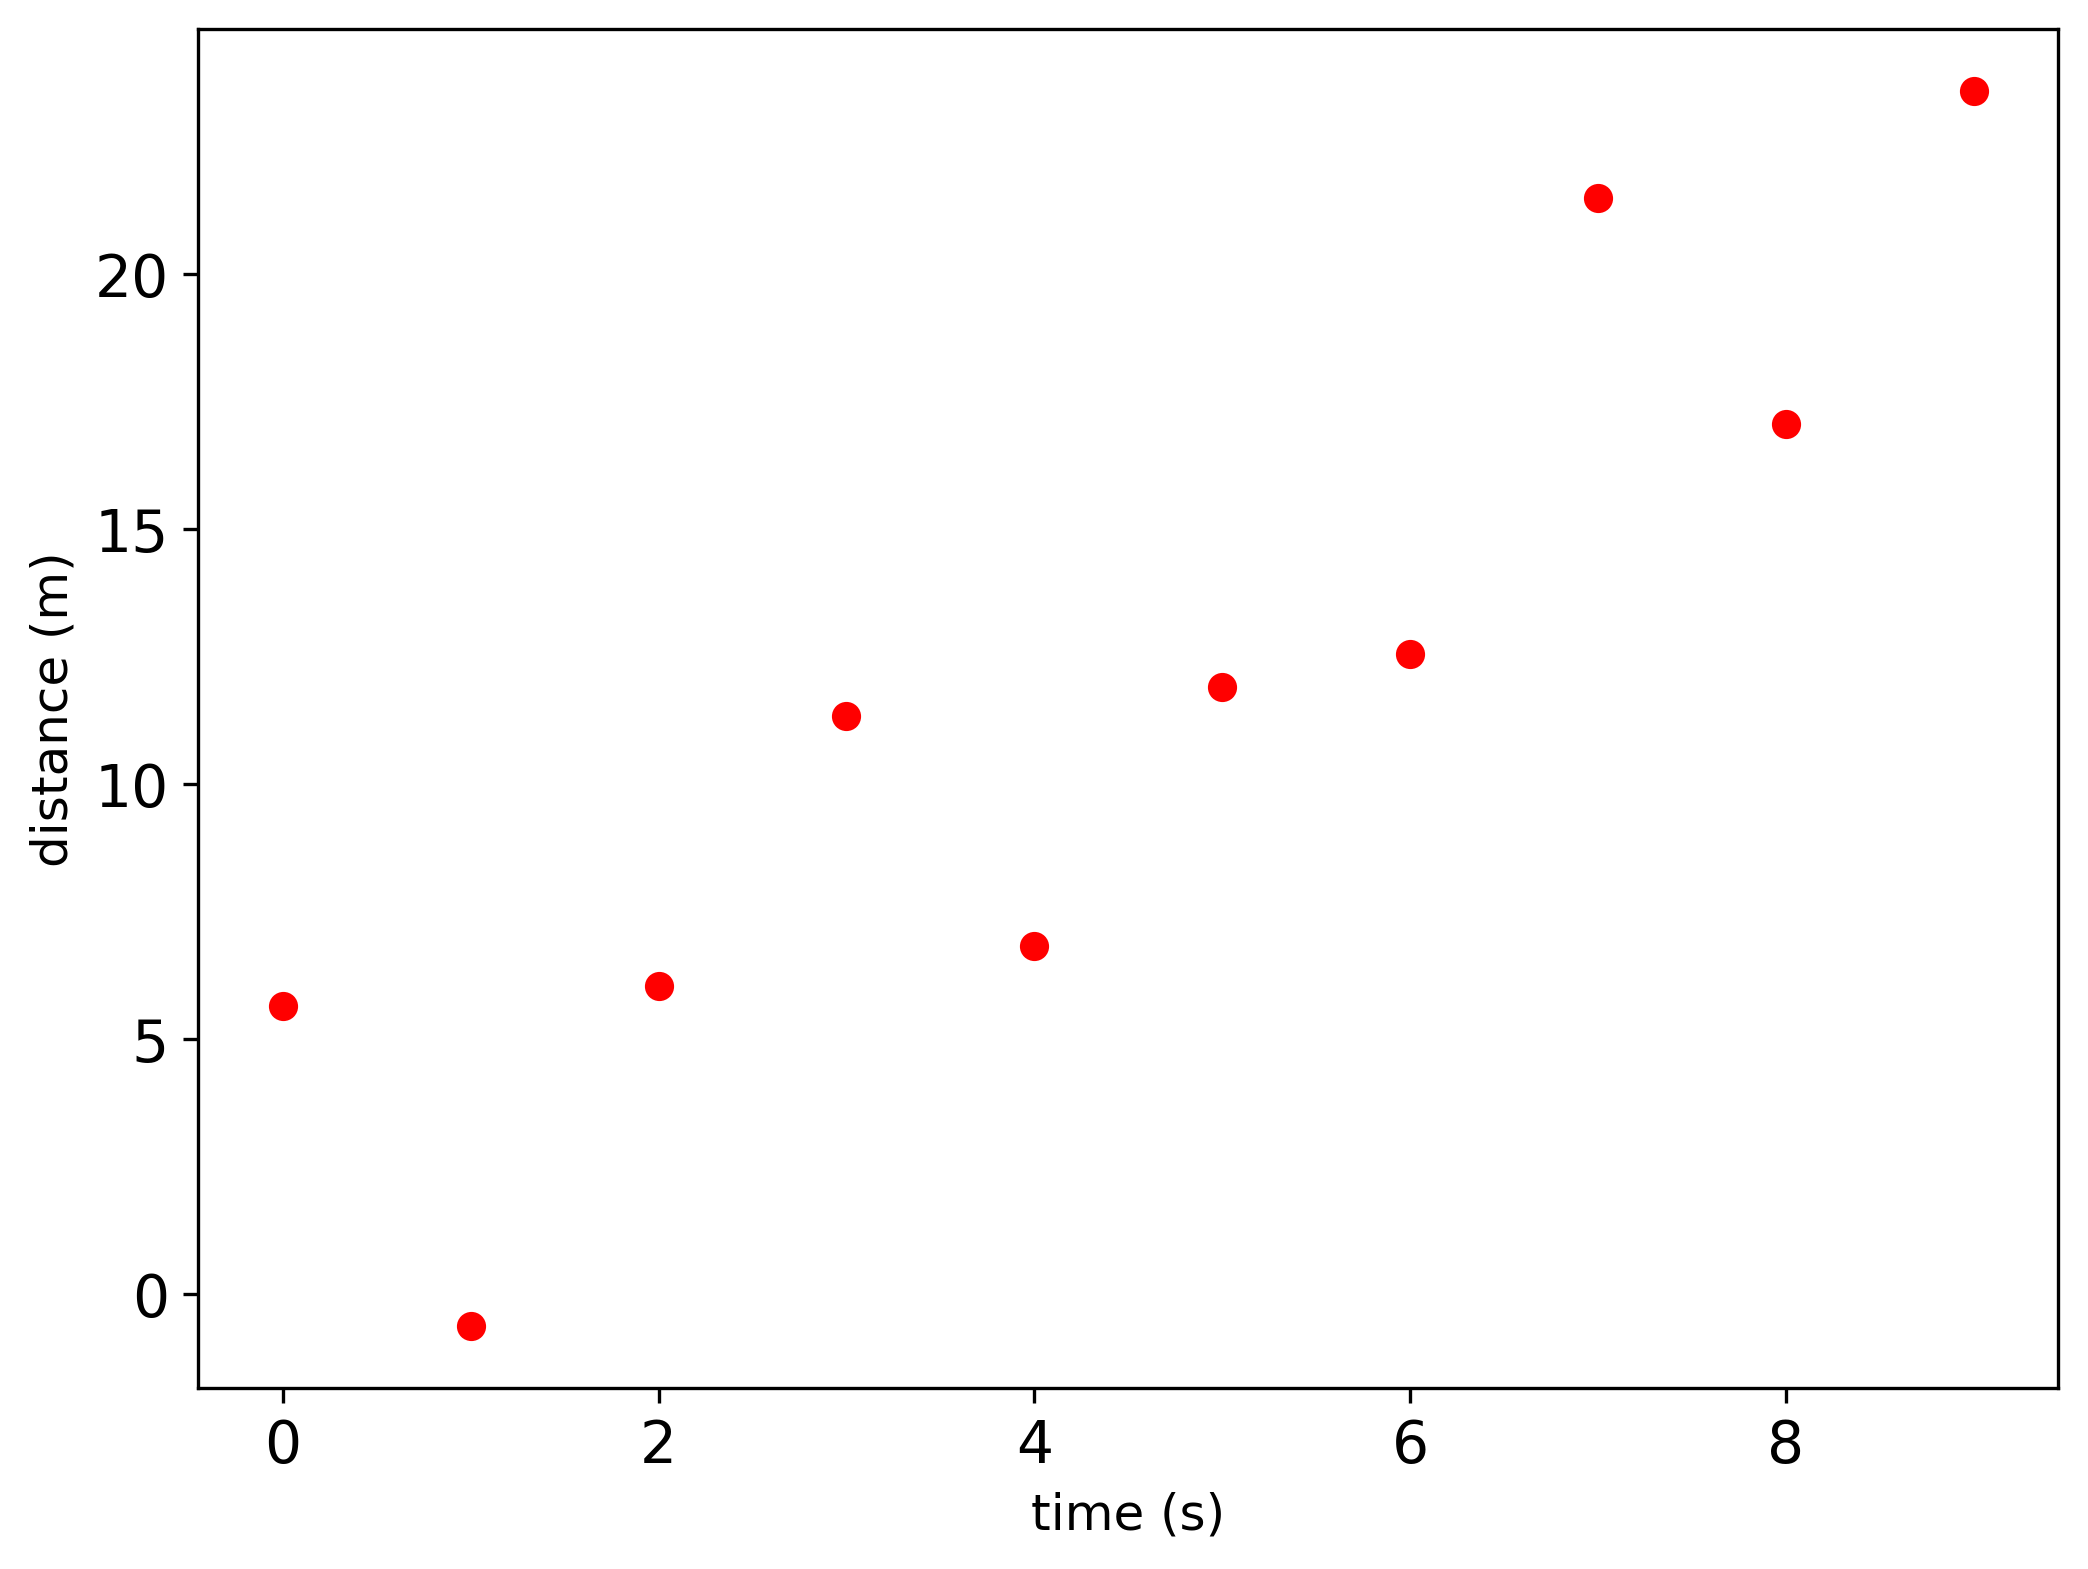

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(x,y, c = 'red')
plt.xlabel('time (s)')
plt.ylabel('distance (m)')
plt.savefig('StraightLine.png')

In [47]:
print(np.round(y,1)) #all the points

[ 5.6 -0.6  6.  11.3  6.8 11.9 12.6 21.5 17.1 23.6]


In [48]:
y = np.round(y,1) #match the book

In [49]:
slopes = np.linspace(1,3,101) 
intercepts = np.linspace(4,6,101)

In [50]:
slopes #just checking

array([1.  , 1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 ,
       1.22, 1.24, 1.26, 1.28, 1.3 , 1.32, 1.34, 1.36, 1.38, 1.4 , 1.42,
       1.44, 1.46, 1.48, 1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62, 1.64,
       1.66, 1.68, 1.7 , 1.72, 1.74, 1.76, 1.78, 1.8 , 1.82, 1.84, 1.86,
       1.88, 1.9 , 1.92, 1.94, 1.96, 1.98, 2.  , 2.02, 2.04, 2.06, 2.08,
       2.1 , 2.12, 2.14, 2.16, 2.18, 2.2 , 2.22, 2.24, 2.26, 2.28, 2.3 ,
       2.32, 2.34, 2.36, 2.38, 2.4 , 2.42, 2.44, 2.46, 2.48, 2.5 , 2.52,
       2.54, 2.56, 2.58, 2.6 , 2.62, 2.64, 2.66, 2.68, 2.7 , 2.72, 2.74,
       2.76, 2.78, 2.8 , 2.82, 2.84, 2.86, 2.88, 2.9 , 2.92, 2.94, 2.96,
       2.98, 3.  ])

#### Note: these are already > 10000 models (curse of dimensionality!)

For convenience, we can define two functions that describe our model (a straight line) and the squared error function:

In [51]:
def model(x,m,b):
    return m*x+b #straight line

def se(m,b,x,y):
    return np.sum(((model(x,m,b) - y)**2))

We can calculate the squared error for each value:

In [52]:
square_errs = np.array([[se(m,b,x,y) for b in intercepts] for m in slopes]) 

#This generates an array where first index refers to slope and second index refers to intercept

In [53]:
square_errs.shape #check that the array has been built properly

(101, 101)

#### Let's figure out which model is the best fit (lowest Squared Error)

In [54]:
print(square_errs.min()) #min Squared Error value

print(square_errs.argmin()) #index of min; however this corresponds to flattened array

indices = np.unravel_index(square_errs.argmin(), square_errs.shape) #indices of minimum value as a (row, col) pair

print(indices)

111.67000000000002
4343
(43, 0)


In [55]:
#Derive the slope and intercept for best model

bestm, bestb = slopes[indices[0]],intercepts[indices[1]]

In [56]:
bestm, bestb

(1.8599999999999999, 4.0)

plt.figure(figsize=(8,6))
plt.scatter(x,y, c = 'red')
plt.xlabel('time (s)')
plt.ylabel('distance (m)')
plt.plot(x, bestb + bestm * x, c = 'black')
plt.savefig('StraightLineWithFit.png')

In [57]:
4.34 + 12*2.04

28.82

In [58]:
#### Let's import a couple of simple machine learning models 


In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
from sklearn.model_selection import train_test_split 

In [62]:
np.random.seed(10) #fix for reproducibility

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=3) #create train/test split

In [63]:
X_train, y_train

(array([6, 3, 1, 0, 7, 4, 9]),
 array([12.6, 11.3, -0.6,  5.6, 21.5,  6.8, 23.6]))

In [64]:
X_test

array([8, 2, 5])

In [65]:
treemodel = DecisionTreeRegressor() # default params

In [66]:
regmodel = LinearRegression() # default params

Build the model on the training set and use it to predict the output for the test set!

In [67]:
y_pred_tree = treemodel.fit(X_train.reshape(-1, 1), y_train).predict(X_test.reshape(-1, 1))

In [68]:
y_pred_reg = regmodel.fit(X_train.reshape(-1, 1), y_train).predict(X_test.reshape(-1, 1))

In [69]:
y_test, y_pred_reg, y_pred_tree #True/predicted by LR and DT respectively

(array([17.1,  6. , 11.9]),
 array([20.48558559,  6.03963964, 13.26261261]),
 array([21.5, -0.6,  6.8]))

Calculate Mean Squared Error for the two models

In [70]:
np.mean((y_test-y_pred_reg)**2)

4.440158063468879

In [71]:
np.mean((y_test-y_pred_tree)**2)

29.64333333333333

Predict the value at t = 12 s with the two models

In [72]:
print(treemodel.predict(np.array(12).reshape(-1, 1)))
print(regmodel.predict(np.array(12).reshape(-1, 1)))

[23.6]
[30.11621622]


In [73]:
import numpy as np
np.mean((y_test-y_pred_tree)**2)

29.64333333333333

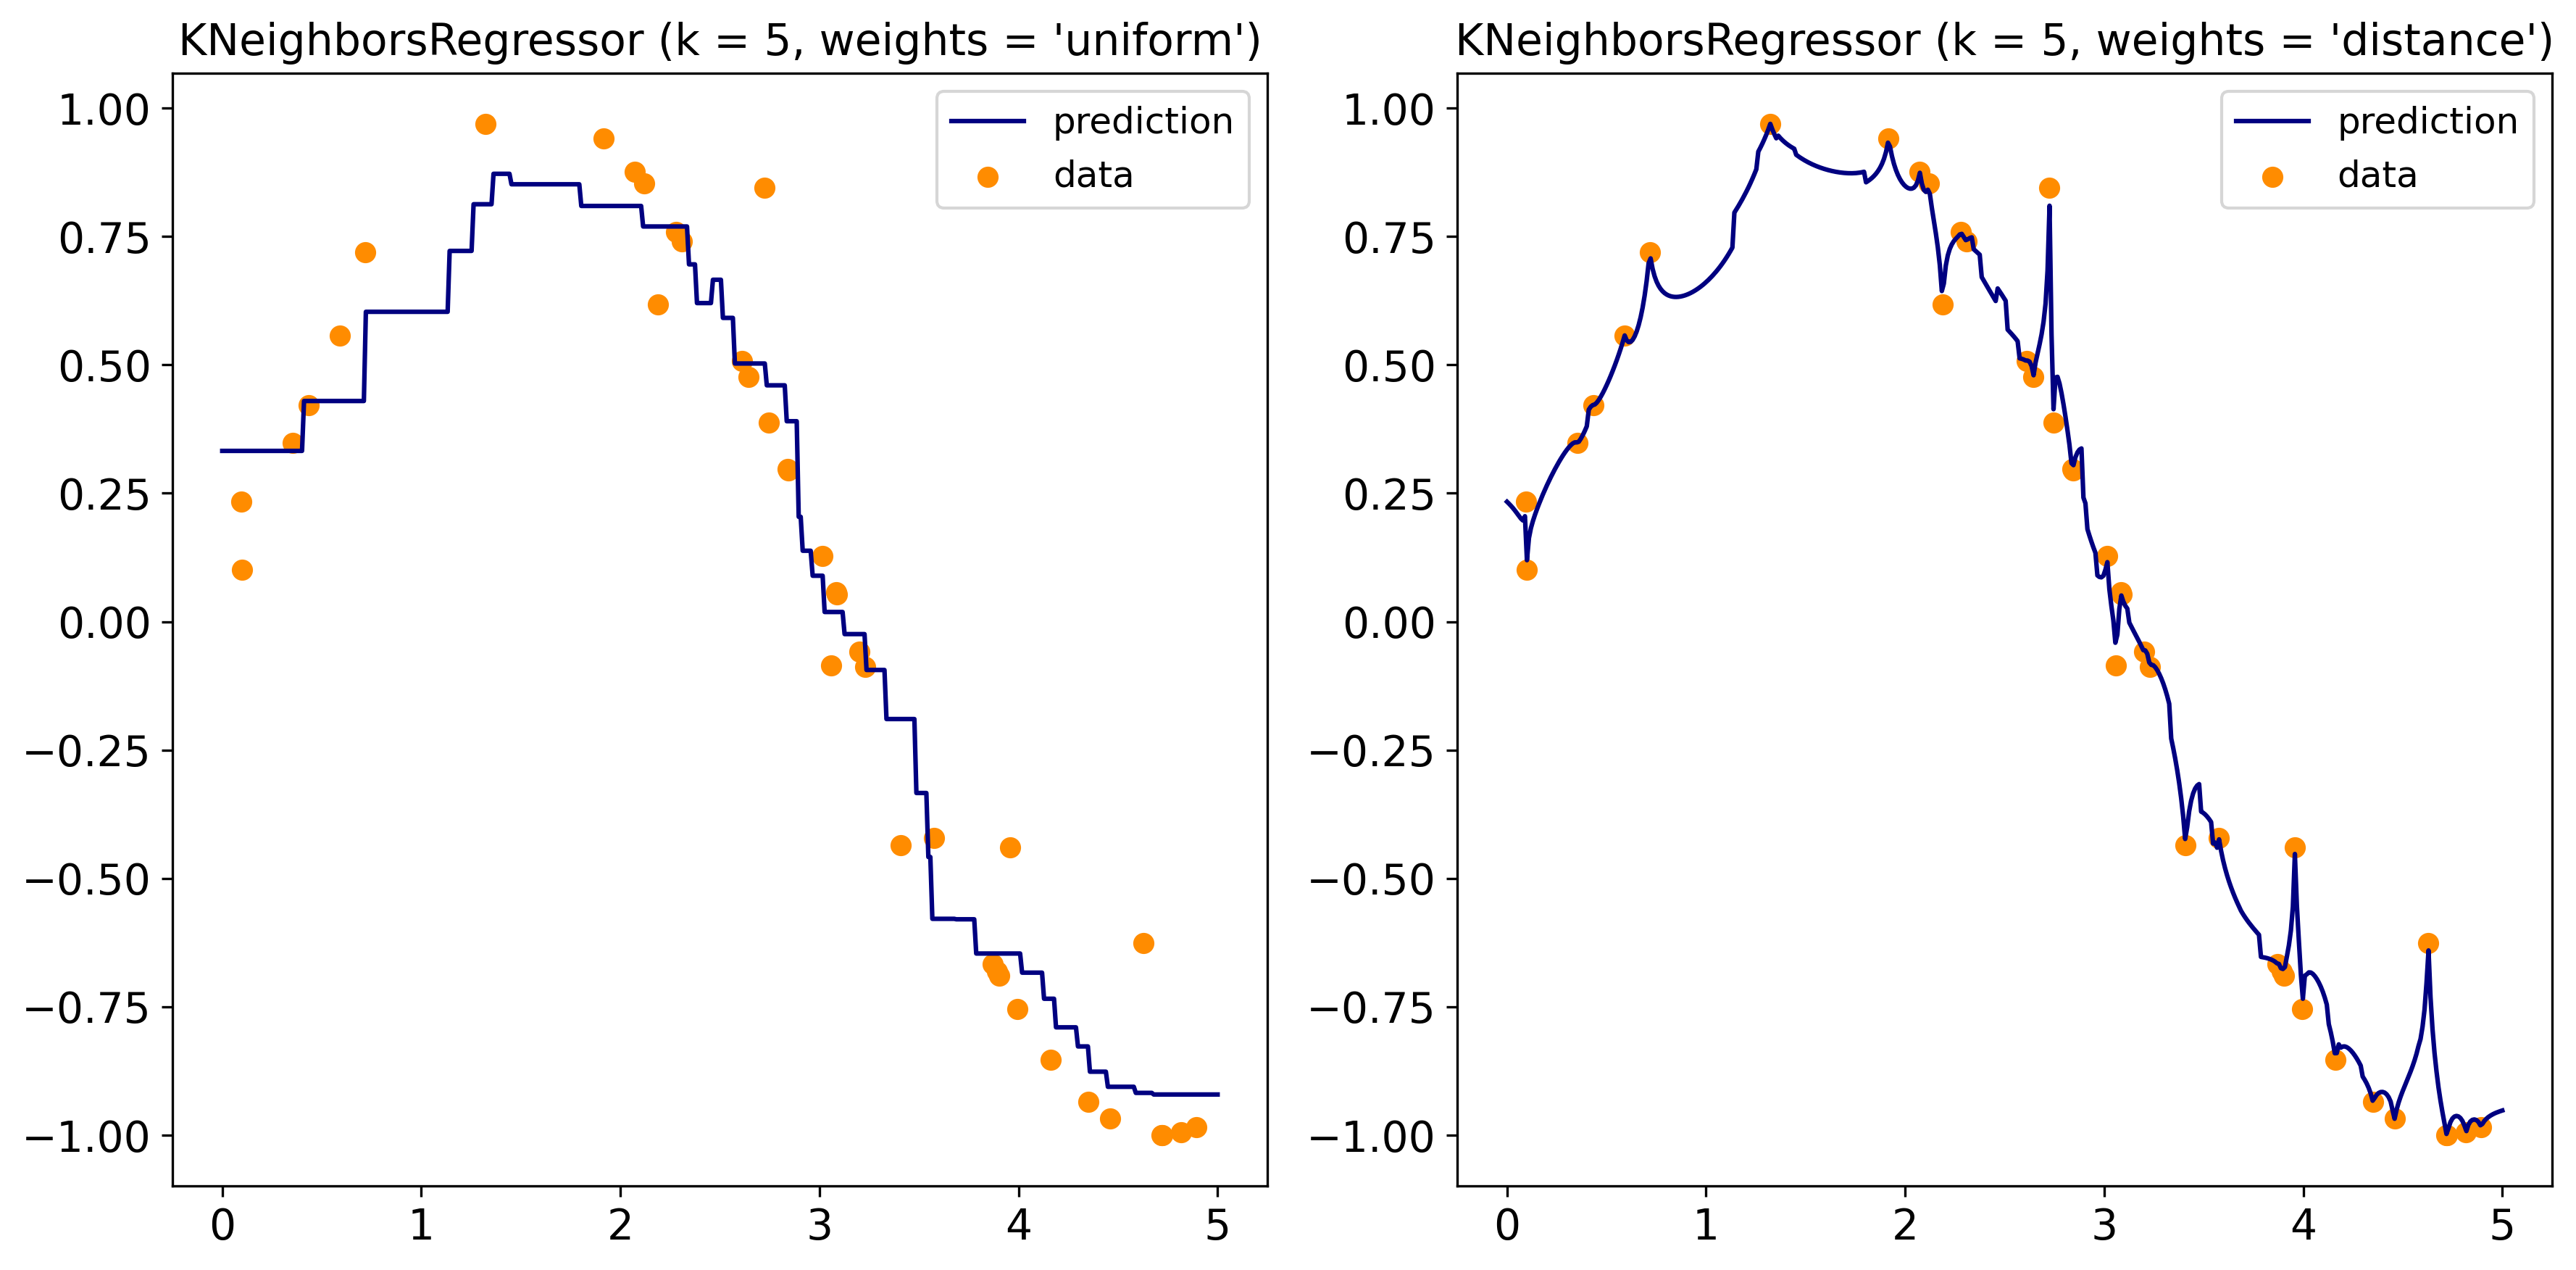

In [74]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Fabian Pedregosa <fabian.pedregosa@inria.fr>
#
# License: BSD 3 clause (C) INRIA


# #############################################################################
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5
plt.figure(figsize=(12,6))

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(1, 2, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

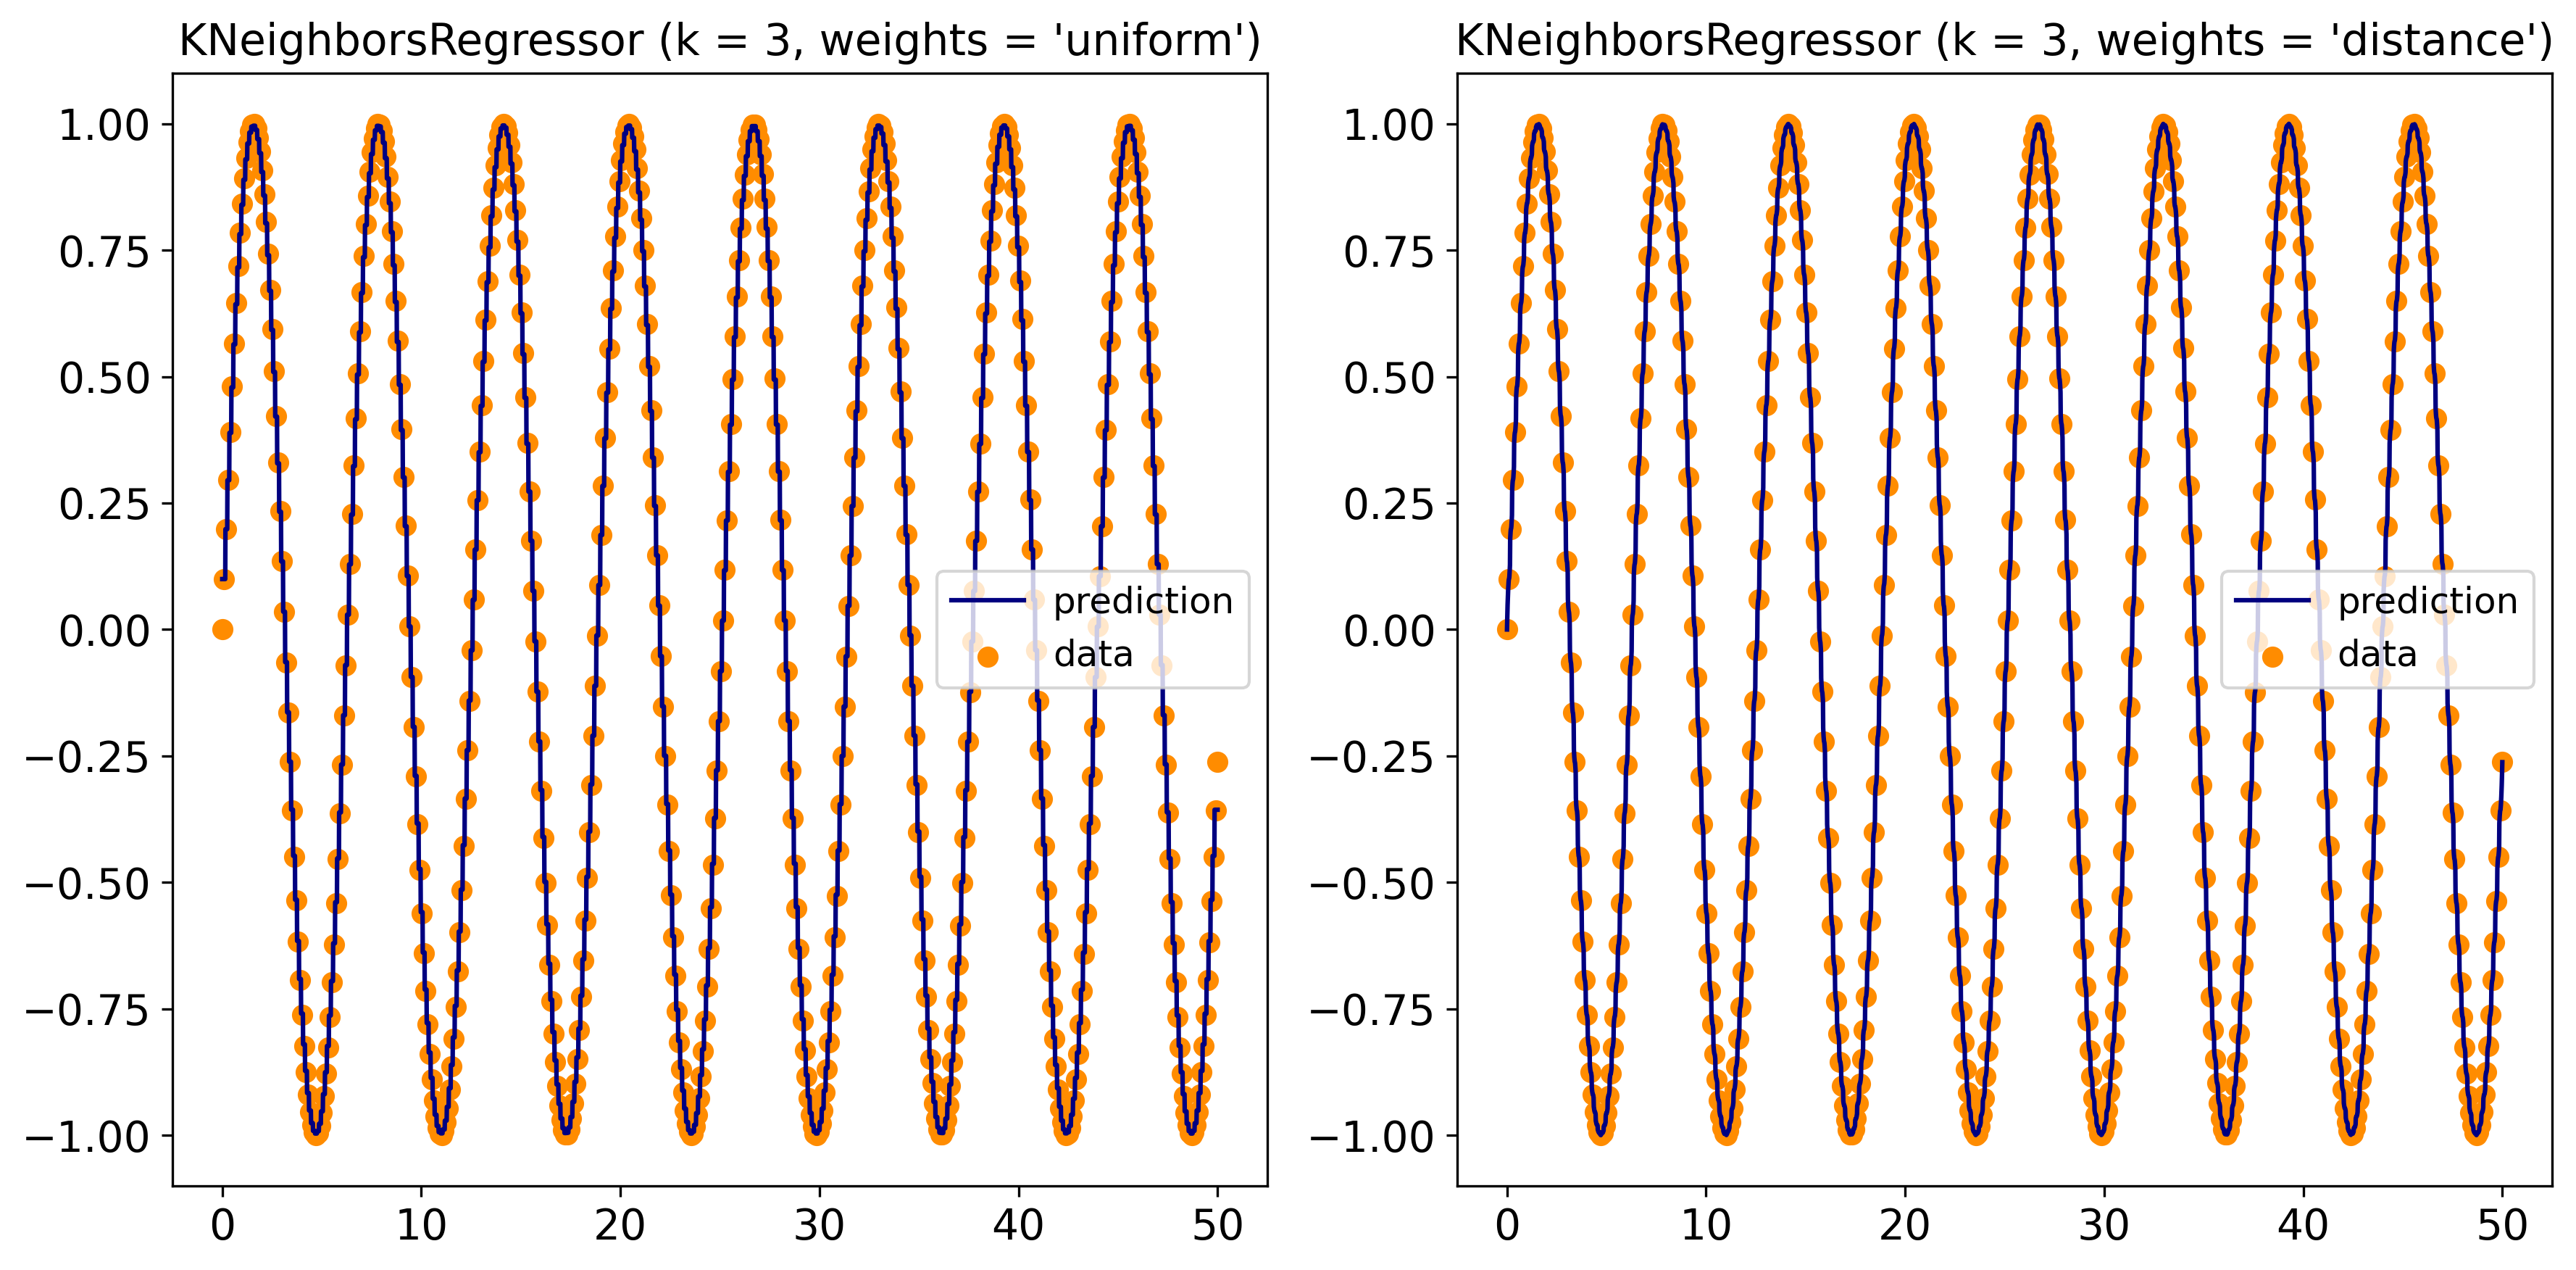

In [93]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Fabian Pedregosa <fabian.pedregosa@inria.fr>
#
# License: BSD 3 clause (C) INRIA

#K means fitting
# #############################################################################
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.linspace(0,50,5000).reshape(-1,1)
T = np.linspace(0, 50, 500)
y = np.sin(T)
# Add noise to targets
#y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 3
plt.figure(figsize=(12,6))

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(T.reshape(-1,1), y.reshape(-1,1)).predict(X)

    plt.subplot(1, 2, i + 1)
    plt.scatter(T, y, color="darkorange", label="data")
    plt.plot(X, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

### Now try fitting a curve that has come up in your projects/homework/research. Your turn!